In [1]:
import pandas as pd

tabela = pd.read_csv("Dados.csv")
display(tabela)

,CODIGO_IES,NOME_IES,CATEGORIA_ADMINISTRATIVA,ORGANIZACAO_ACADEMICA,CODIGO_CURSO,NOME_CURSO,GRAU,AREA_OCDE,MODALIDADE,SITUACAO_CURSO,QT_VAGAS_AUTORIZADAS,CARGA_HORARIA,CODIGO_AREA_OCDE_CINE,AREA_OCDE_CINE,CODIGO_MUNICIPIO,MUNICIPIO,UF,REGIAO
0,4751,CENTRO UNIVERSITÁRIO UNIFATECIE,Privada com fins lucrativos,Centro Universitário,1556773,ENGENHARIA AGRONÔMICA,Bacharelado,Agronomia,Educação a Distância,Em atividade,1000,4400,301,Agronomia,3541406,Presidente Prudente,SP,SUDESTE
1,1491,CENTRO UNIVERSITÁRIO INTERNACIONAL,Privada com fins lucrativos,Centro Universitário,1186955,LETRAS,Licenciatura,Formação de professor de língua/literatura ver...,Educação a Distância,Em atividade,3000,3992,58,Formação de professor de língua/literatura ver...,2516201,Sousa,PB,NORDESTE
2,1472,CENTRO UNIVERSITÁRIO LEONARDO DA VINCI,Privada com fins lucrativos,Centro Universitário,99950,GEOGRAFIA,Licenciatura,Formação de professor de geografia,Educação a Distância,Em atividade,7620,3500,39,Formação de professor de geografia,2800308,Aracaju,SE,NORDESTE
3,221,UNIVERSIDADE CRUZEIRO DO SUL,Privada com fins lucrativos,Universidade,1467998,EDUCAÇÃO FÍSICA,Bacharelado,Educação física,Educação a Distância,Em atividade,1200,3200,328,Educação física,4113205,Lapa,PR,SUL
4,1472,CENTRO UNIVERSITÁRIO LEONARDO DA VINCI,Privada com fins lucrativos,Centro Universitário,1516788,SERVIÇOS PENAIS,Tecnológico,NaN,Educação a Distância,Em atividade,1500,1980,357,Serviços penais,2601706,Belo Jardim,PE,NORDESTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902671,163,UNIVERSIDADE ESTÁCIO DE SÁ,Privada com fins lucrativos,Universidade,1518220,CIÊNCIA DE DADOS,Tecnológico,NaN,Educação a Distância,Em atividade,2589,2086,456,Ciência de dados,4300604,Alvorada,RS,SUL
902672,1491,CENTRO UNIVERSITÁRIO INTERNACIONAL,Privada com fins lucrativos,Centro Universitário,1468267,MÚSICA,Licenciatura,Formação de professor de música,Educação a Distância,Em atividade,1700,3992,42,Formação de professor de música,2704302,Maceió,AL,NORDESTE
902673,1491,CENTRO UNIVERSITÁRIO INTERNACIONAL,Privada com fins lucrativos,Centro Universitário,1185929,CIÊNCIAS CONTÁBEIS,Bacharelado,Ciências contábeis,Educação a Distância,Em atividade,4500,3260,138,Ciências contábeis,3554003,Tatuí,SP,SUDESTE
902674,298,Universidade Pitágoras Unopar Anhanguera,Privada com fins lucrativos,Universidade,97329,MARKETING,Tecnológico,NaN,Educação a Distância,Em atividade,6000,1700,158,Marketing,2601102,Araripina,PE,NORDESTE


Contando quantas universidades são públicas e quantas são privadas no Brasil:

In [3]:
import pandas as pd

tabela = pd.read_csv("Dados.csv")
tipo_count = tabela['CATEGORIA_ADMINISTRATIVA'].value_counts()

privadas_fins_lucrativos = tipo_count.get('Privada com fins lucrativos', 0)
publicas_estaduais_federais = tipo_count.get('Pública Estadual', 0) + tipo_count.get('Pública Federal', 0)  + tipo_count.get('Pública Municipal', 0)

print("Universidades Privadas com Fins Lucrativos:", privadas_fins_lucrativos)
print("Universidades Públicas Estaduais, Federais ou Municipais:", publicas_estaduais_federais)



Universidades Privadas com Fins Lucrativos: 761454
Universidades Públicas Estaduais, Federais ou Municipais: 28416


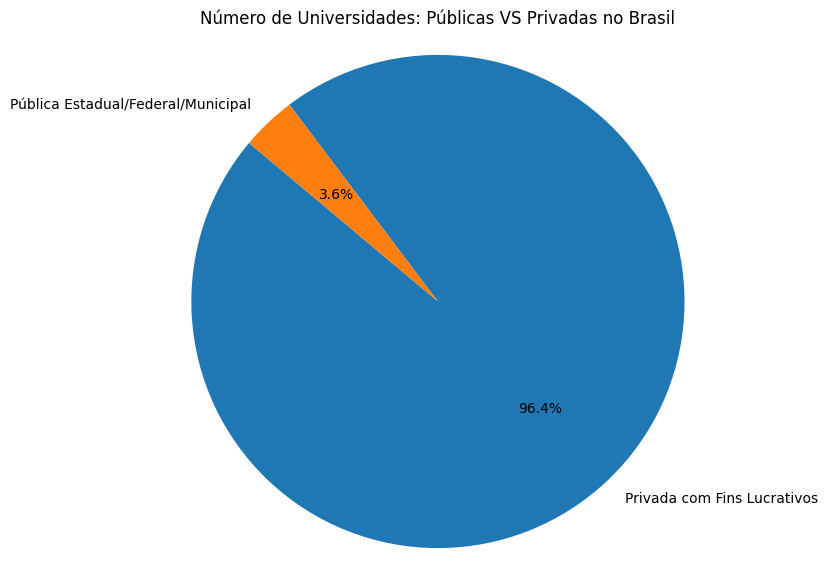

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

tabela = pd.read_csv("Dados.csv")

tipo_count = tabela['CATEGORIA_ADMINISTRATIVA'].value_counts()

privadas_fins_lucrativos = tipo_count.get('Privada com fins lucrativos', 0)

publicas_estaduais_federais = tipo_count.get('Pública Estadual', 0) + tipo_count.get('Pública Federal', 0) + tipo_count.get('Pública Municipal', 0)

categorias = ['Privada com Fins Lucrativos', 'Pública Estadual/Federal/Municipal']
quantidades = [privadas_fins_lucrativos, publicas_estaduais_federais]

plt.figure(figsize=(7, 7))
plt.pie(quantidades, labels=categorias, autopct='%1.1f%%', startangle=140)
plt.title('Número de Universidades: Públicas VS Privadas no Brasil')
plt.axis('equal')
plt.show()



Universidades Privadas e Públicas por região:

In [15]:
tabela = tabela[tabela['REGIAO'] != 'IGNORADO/EXTERIOR']

contagem_por_regiao_tipo = tabela.groupby(['REGIAO', 'CATEGORIA_ADMINISTRATIVA']).size().unstack(fill_value=0)

universidades_privadas_com_fins_lucrativos = contagem_por_regiao_tipo.get('Privada com fins lucrativos', 0)
universidades_publicas = contagem_por_regiao_tipo.get('Pública Estadual', 0) + contagem_por_regiao_tipo.get('Pública Federal', 0) + contagem_por_regiao_tipo.get('Pública Municipal', 0)

print("Universidades Privadas com Fins Lucrativos por Região:")
print(universidades_privadas_com_fins_lucrativos)
print("\nUniversidades Públicas por Região:")
print(universidades_publicas)



Universidades Privadas com Fins Lucrativos por Região:
REGIAO
CENTRO-OESTE     66706
NORDESTE        181656
NORTE            72654
SUDESTE         281872
SUL             158144
Name: Privada com fins lucrativos, dtype: int64

Universidades Públicas por Região:
REGIAO
CENTRO-OESTE    2857
NORDESTE        8220
NORTE           3174
SUDESTE         9618
SUL             4547
dtype: int64


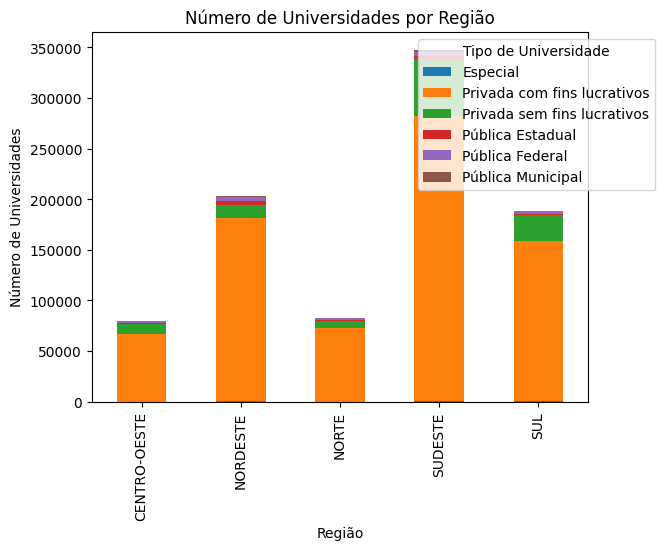

In [16]:
import matplotlib.pyplot as plt

contagem_por_regiao_tipo.plot(kind='bar', stacked=True)
plt.title('Número de Universidades por Região')
plt.xlabel('Região')
plt.ylabel('Número de Universidades')
plt.legend(title='Tipo de Universidade', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


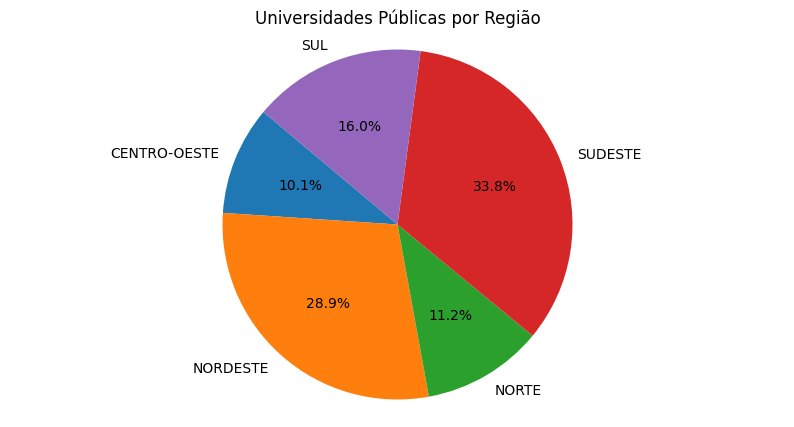

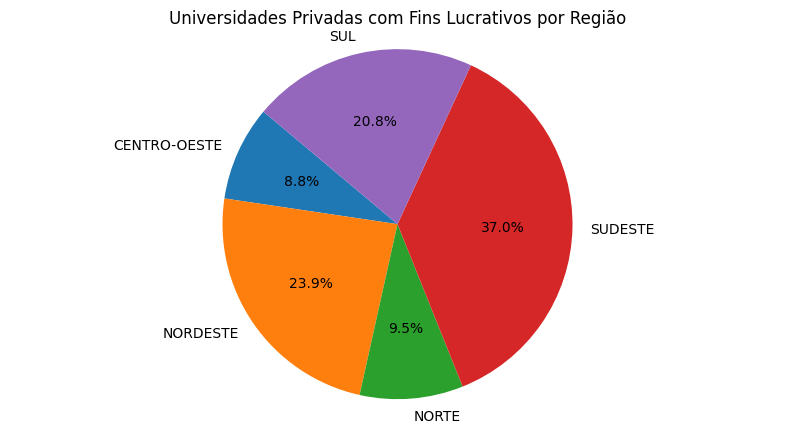

In [17]:
import matplotlib.pyplot as plt


universidades_publicas_por_regiao = contagem_por_regiao_tipo.loc[:, 'Pública Estadual'] + contagem_por_regiao_tipo.loc[:, 'Pública Federal'] + contagem_por_regiao_tipo.loc[:, 'Pública Municipal']
universidades_privadas_fins_lucrativos = contagem_por_regiao_tipo['Privada com fins lucrativos']


# Gráfico de pizza para universidades públicas por região
plt.figure(figsize=(10, 5))
plt.pie(universidades_publicas_por_regiao, labels=universidades_publicas_por_regiao.index, autopct='%1.1f%%', startangle=140)
plt.title('Universidades Públicas por Região')
plt.axis('equal') 



plt.show()

# Gráfico de pizza para universidades privadas com fins lucrativos
plt.figure(figsize=(10, 5))
plt.pie(universidades_privadas_fins_lucrativos, labels=universidades_privadas_fins_lucrativos.index, autopct='%1.1f%%', startangle=140)
plt.title('Universidades Privadas com Fins Lucrativos por Região')
plt.axis('equal')  



plt.show()


Contado quantas universidades são no modelo a distância e quantas são no modelo presencial

In [6]:
modelo_count = tabela['MODALIDADE'].value_counts()

ead = modelo_count.get('Educação a Distância', 0)
presencial = modelo_count.get('Educação Presencial', 0)

print("Universidades em Educação a Distância:", ead)
print("Universidades em Educação Presencial:", presencial)

Universidades em Educação a Distância: 830039
Universidades em Educação Presencial: 72637


Gráfico do número de universidades com modelo a distância e presencial no Brasil:

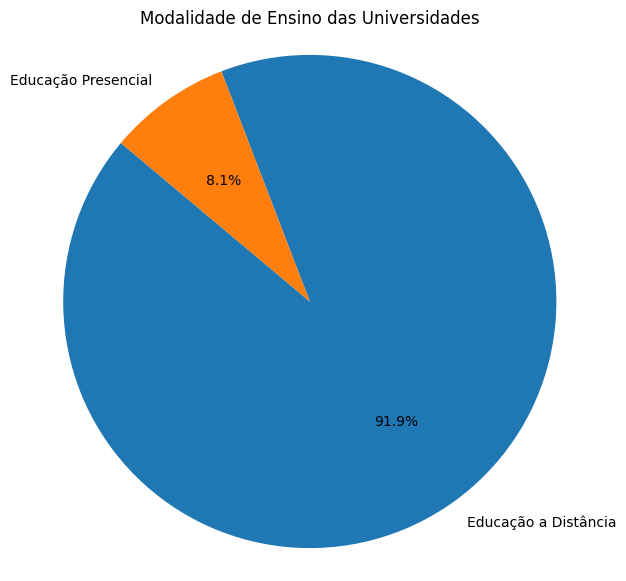

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

tabela = pd.read_csv("Dados.csv")

tabela = tabela[tabela['REGIAO'] != 'IGNORADO/EXTERIOR']

ead = tabela[tabela['MODALIDADE'] == 'Educação a Distância'].shape[0]
presencial = tabela[tabela['MODALIDADE'] == 'Educação Presencial'].shape[0]

labels = ['Educação a Distância', 'Educação Presencial']
quantidades = [ead, presencial]

plt.figure(figsize=(7, 7))
plt.pie(quantidades, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Modalidade de Ensino das Universidades')
plt.axis('equal')
plt.show()


Contando os cursos dividindo em grau (Bacharelado, Linceciatura e Tecnológico)

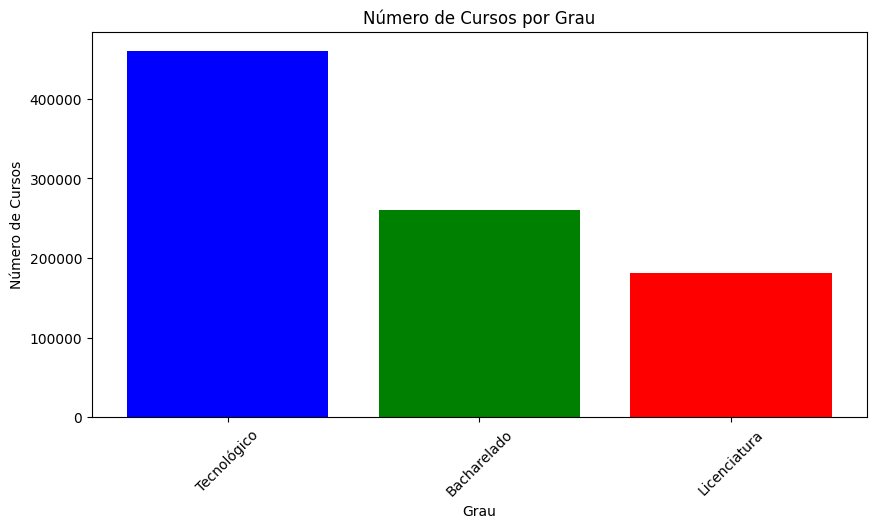

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

tabela = pd.read_csv("Dados.csv")

grau_filtrado = tabela[tabela['GRAU'].isin(['Bacharelado', 'Licenciatura', 'Tecnológico'])]

grau_count = grau_filtrado['GRAU'].value_counts()


cores = ['b', 'g', 'r']  # Azul, Verde e Vermelho

graus = grau_count.index
quantidades = grau_count.values

plt.figure(figsize=(10, 5))
plt.bar(graus, quantidades, color=cores)
plt.title('Número de Cursos por Grau')
plt.xlabel('Grau')
plt.ylabel('Número de Cursos')
plt.xticks(rotation=45)
plt.show()




Separando o grau dos cursos por região:

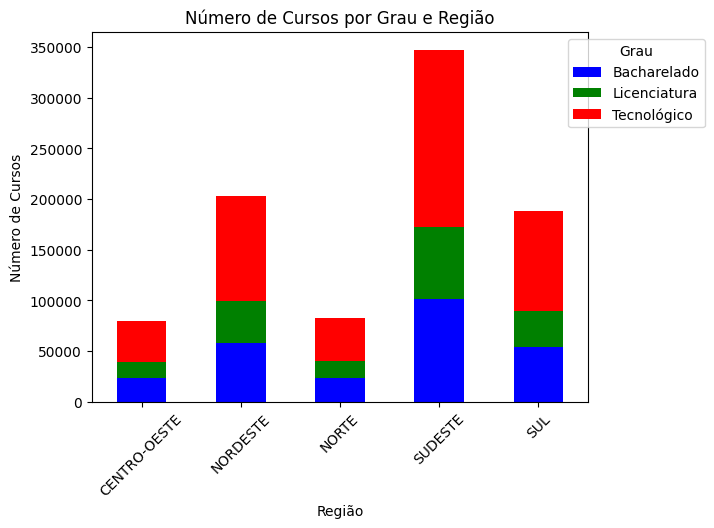

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

tabela = pd.read_csv("Dados.csv")

tabela_filtrada = tabela[tabela['REGIAO'] != 'IGNORADO/EXTERIOR']

grau_filtrado = tabela_filtrada[tabela_filtrada['GRAU'].isin(['Bacharelado', 'Licenciatura', 'Tecnológico'])]

contagem_por_regiao_grau = grau_filtrado.groupby(['REGIAO', 'GRAU']).size().unstack(fill_value=0)

cores = ['b', 'g', 'r']  # Azul, Verde e Vermelho

contagem_por_regiao_grau.plot(kind='bar', stacked=True, color=cores)
plt.title('Número de Cursos por Grau e Região')
plt.xlabel('Região')
plt.ylabel('Número de Cursos')
plt.xticks(rotation=45)
plt.legend(title='Grau', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()
